In [115]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
pwd = os.getcwd()
# file_path = os.path.join(pwd, os.pardir, 'data/Week1_challenge_data_source(CSV).csv')
# file_path = os.path.join(pwd, os.pardir, 'data/clean_data.csv')
file_path = os.path.join(pwd, os.pardir, 'data/sample_data.csv')

In [117]:
# data = pd.read_csv(file_path, na_values=["undefined"], keep_default_na=True, parse_dates=["Start", "End"])
data = pd.read_csv(file_path, parse_dates=["Start", "End"])

In [118]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114500000000000000.00,43559.50069,770,43580.60764,662,1823652,208201000000000.00,33664962239,35521200000000.00,9.16457E+15,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,13114500000000000000.00,43564.54444,235,43580.34375,606,1365104,208202000000000.00,33681854413,35794000000000.00,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,13114500000000000000.00,43564.7375,1,43580.49861,652,1361762,208200000000000.00,33760627129,35281500000000.00,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,13114500000000000000.00,43565.02153,486,43580.31667,171,1321509,208201000000000.00,33750343200,35356600000000.00,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,13114500000000000000.00,43567.84028,565,43580.44444,954,1089009,208201000000000.00,33699795932,35407000000000.00,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589


In [119]:
data.shape

(19, 55)

In [120]:
data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (s)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social M

In [121]:
data_modified = data.copy()

In [122]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 19 non-null     float64
 1   Start                                     19 non-null     object 
 2   Start ms                                  19 non-null     int64  
 3   End                                       19 non-null     object 
 4   End ms                                    19 non-null     int64  
 5   Dur. (s)                                  19 non-null     int64  
 6   IMSI                                      19 non-null     float64
 7   MSISDN/Number                             19 non-null     int64  
 8   IMEI                                      19 non-null     float64
 9   Last Location Name                        19 non-null     object 
 10  Avg RTT DL (ms)                         

In [123]:
# sets global styling for graphs
plt.style.use('seaborn')

### Top 10 used handsets by customers

In [38]:
top_10_handsets = data_modified["Handset Type"].value_counts().nlargest(10)

In [39]:
top_10_handsets

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
Unknown                          8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: Handset Type, dtype: int64

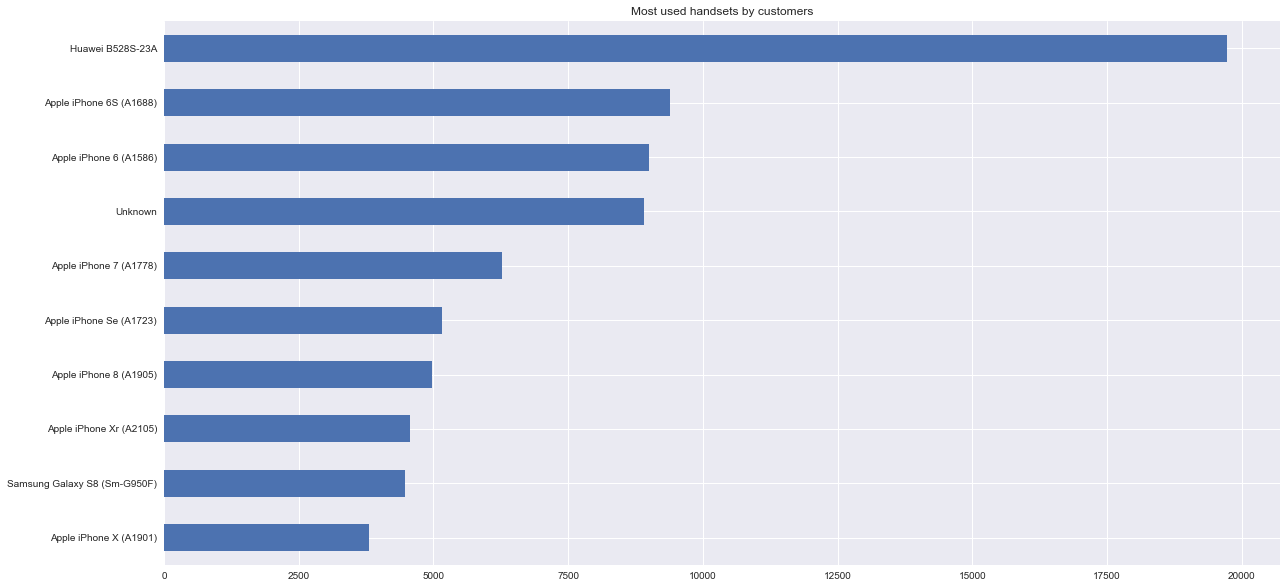

In [40]:
top_10_handsets.plot(kind="barh", figsize=(20, 10), title="Most used handsets by customers").invert_yaxis()

### Top 3 handset manufacturers

In [41]:
top_3_handset_manufacturers = data_modified["Handset Manufacturer"].value_counts().nlargest(3)

In [42]:
top_3_handset_manufacturers

Apple      59339
Samsung    40429
Huawei     34296
Name: Handset Manufacturer, dtype: int64

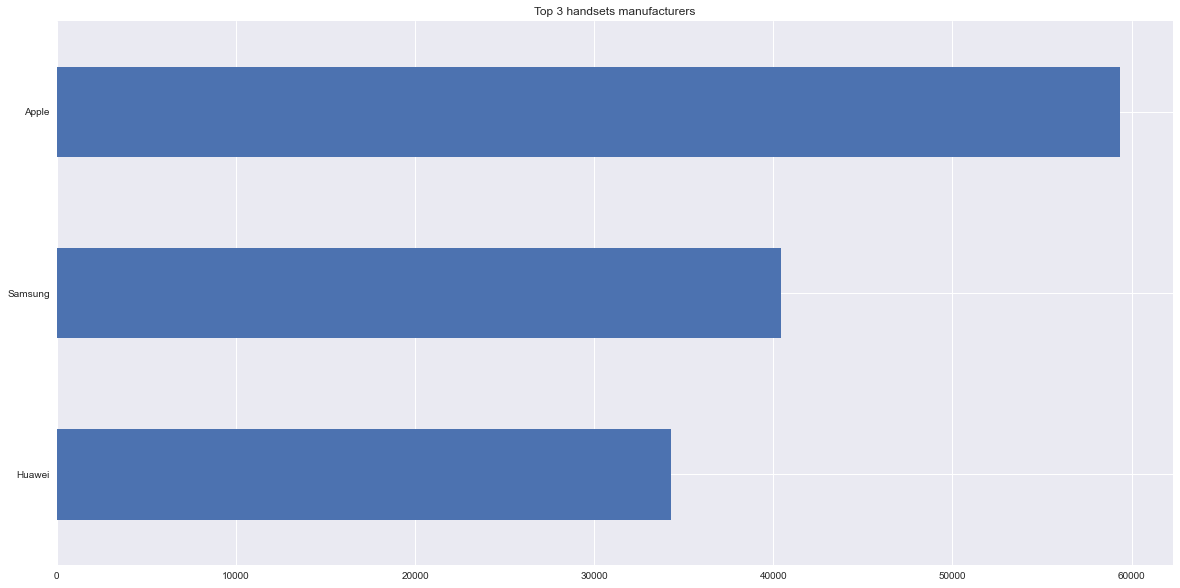

In [44]:
top_3_handset_manufacturers.plot(kind="barh", figsize=(20, 10), title="Top 3 handsets manufacturers").invert_yaxis()

### Top 5 Handsets Manufactured by Apple

In [45]:
top_5_apple_handsets = data_modified[data_modified["Handset Manufacturer"] == "Apple"][["Handset Manufacturer", "Handset Type"]].groupby("Handset Type").count().nlargest(n=5, columns="Handset Manufacturer")

In [46]:
top_5_apple_handsets

,Handset Manufacturer
Handset Type,
Apple iPhone 6S (A1688),9395
Apple iPhone 6 (A1586),8993
Apple iPhone 7 (A1778),6279
Apple iPhone Se (A1723),5165
Apple iPhone 8 (A1905),4977


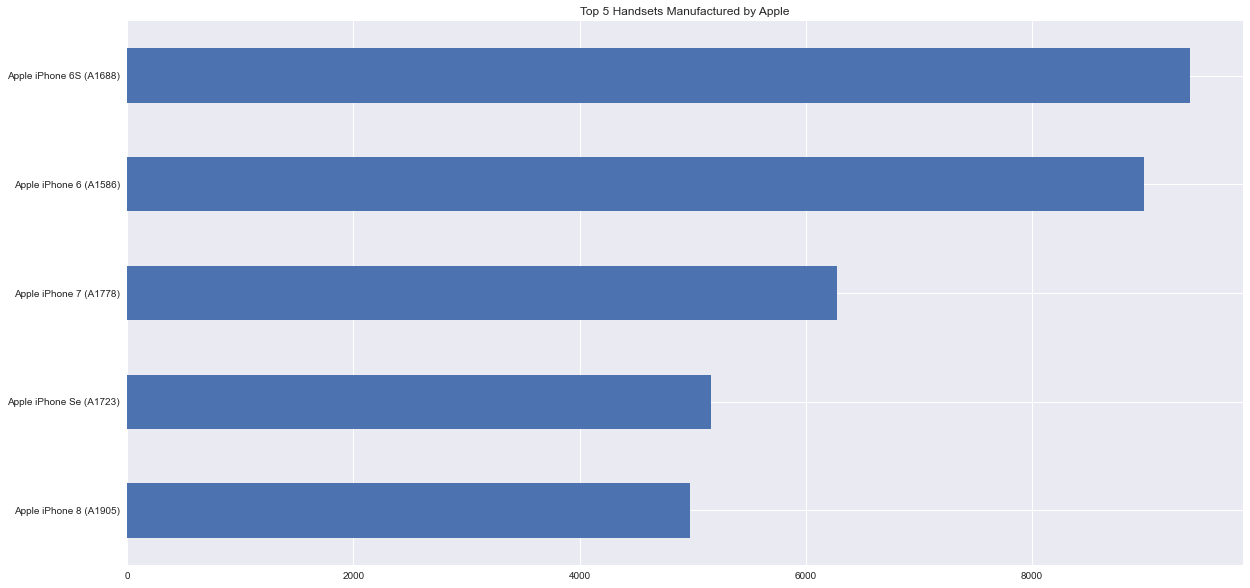

In [47]:
top_5_apple_handsets.plot(kind="barh", figsize=(20, 10), title="Top 5 Handsets Manufactured by Apple", legend=False, xlabel="").invert_yaxis()

### Top 5 Handsets Manufactured by Samsung

In [48]:
top_5_samsung_handsets = data_modified[data_modified["Handset Manufacturer"] == "Samsung"][["Handset Manufacturer", "Handset Type"]].groupby("Handset Type").count().nlargest(n=5, columns="Handset Manufacturer")

In [49]:
top_5_samsung_handsets

,Handset Manufacturer
Handset Type,
Samsung Galaxy S8 (Sm-G950F),4464
Samsung Galaxy A5 Sm-A520F,3700
Samsung Galaxy J5 (Sm-J530),3675
Samsung Galaxy J3 (Sm-J330),3456
Samsung Galaxy S7 (Sm-G930X),3171


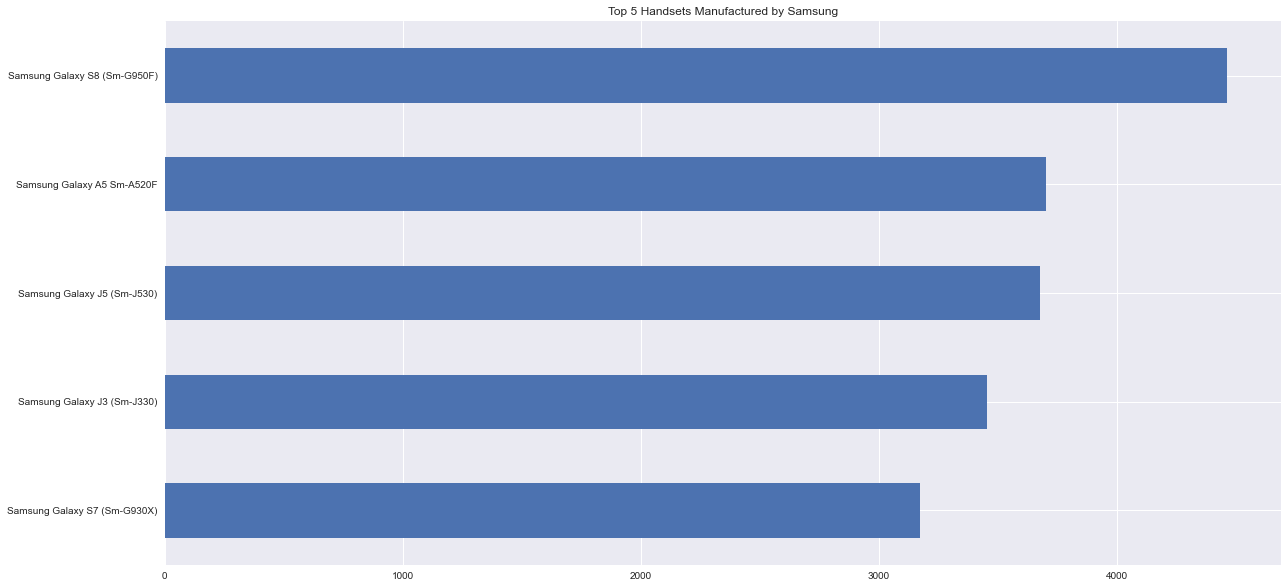

In [50]:
top_5_samsung_handsets.plot(kind="barh", figsize=(20, 10), title="Top 5 Handsets Manufactured by Samsung", legend=False, xlabel="").invert_yaxis()

### Top 5 Handsets Manufactured by Huawei

In [51]:
top_5_huawei_handsets = data_modified[data_modified["Handset Manufacturer"] == "Huawei"][["Handset Manufacturer", "Handset Type"]].groupby("Handset Type").count().nlargest(n=5, columns="Handset Manufacturer")

In [52]:
top_5_huawei_handsets

,Handset Manufacturer
Handset Type,
Huawei B528S-23A,19727
Huawei E5180,2074
Huawei P20 Lite Huawei Nova 3E,2012
Huawei P20,1475
Huawei Y6 2018,996


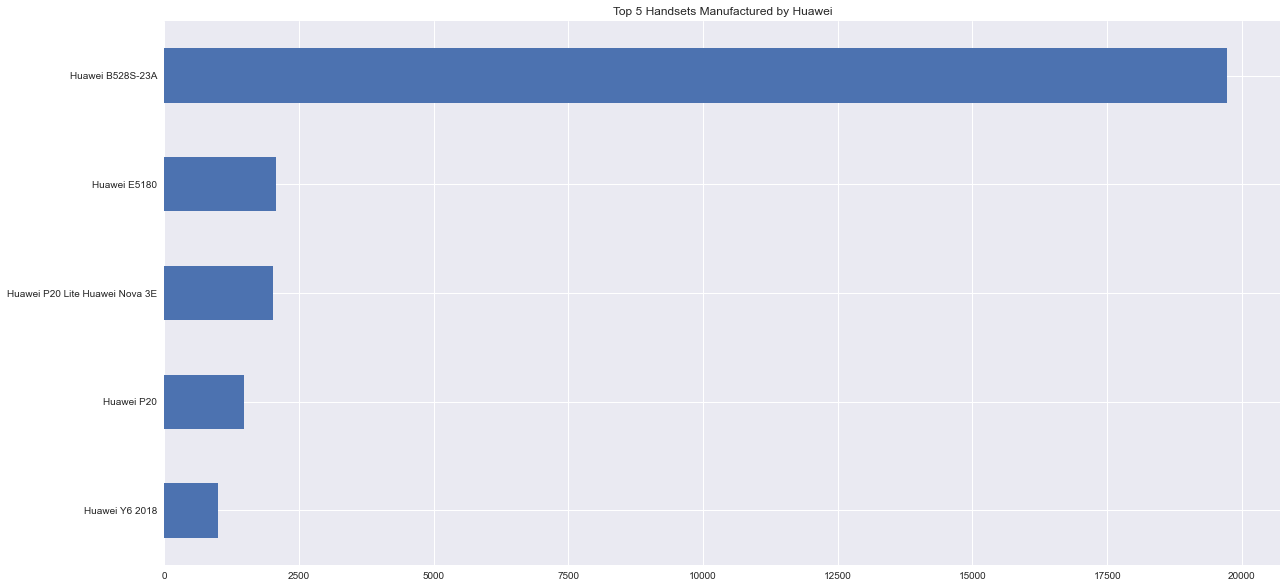

In [53]:
top_5_huawei_handsets.plot(kind="barh", figsize=(20, 10), title="Top 5 Handsets Manufactured by Huawei", legend=False, xlabel="").invert_yaxis()

Looking at the insights, TellCo should start selling Apple, Samsung and Huawei manufactured handsets by partnering with them. The marketing team can then let customers know that they're selling these handsets in order to generate more revenue. 

In [54]:
# to convert the scientific notation to decimal format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [55]:
# reset the decimal format back to scientific notation
# pd.reset_option('display.float_format')

### Grouping values to look into sessions per user
---

In [124]:
data_modified.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114500000000000000.00,43559.50069,770,43580.60764,662,1823652,208201000000000.00,33664962239,35521200000000.00,9.16457E+15,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,13114500000000000000.00,43564.54444,235,43580.34375,606,1365104,208202000000000.00,33681854413,35794000000000.00,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,13114500000000000000.00,43564.7375,1,43580.49861,652,1361762,208200000000000.00,33760627129,35281500000000.00,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,13114500000000000000.00,43565.02153,486,43580.31667,171,1321509,208201000000000.00,33750343200,35356600000000.00,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,13114500000000000000.00,43567.84028,565,43580.44444,954,1089009,208201000000000.00,33699795932,35407000000000.00,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589


In [154]:
user_agg = data_modified.groupby(["MSISDN/Number"], as_index=False).agg({'Bearer Id':'count', "Dur. (s)": "sum", "Total UL (Bytes)": "sum", "Total DL (Bytes)": "sum",  "Social Media UL (Bytes)": "sum", "Social Media DL (Bytes)": "sum", "Google UL (Bytes)": "sum", "Google DL (Bytes)": "sum", "Email UL (Bytes)": "sum", "Email DL (Bytes)": "sum", "Youtube UL (Bytes)": "sum", "Youtube DL (Bytes)": "sum", "Netflix UL (Bytes)": "sum", "Netflix DL (Bytes)": "sum", "Gaming UL (Bytes)": "sum", "Gaming DL (Bytes)": "sum", "Other UL (Bytes)": "sum", "Other DL (Bytes)": "sum"})
user_agg.reset_index(drop=True, inplace=True)

In [155]:
# change column to string to avoid numerical calculations
user_agg["MSISDN/Number"] = user_agg["MSISDN/Number"].astype(str)

In [156]:
user_agg.shape

(17, 19)

In [157]:
user_agg.rename(columns={"Bearer Id": "Session Count"}, inplace=True)

In [158]:
user_agg["Total Data Transferred"] = user_agg["Total UL (Bytes)"] + user_agg["Total DL (Bytes)"]

In [159]:
user_agg["Google Volume (Bytes)"] = user_agg["Google UL (Bytes)"] + user_agg["Google DL (Bytes)"]
user_agg["Netflix Volume (Bytes)"] = user_agg["Netflix UL (Bytes)"] + user_agg["Netflix DL (Bytes)"]
user_agg["Youtube Volume (Bytes)"] = user_agg["Youtube UL (Bytes)"] + user_agg["Youtube DL (Bytes)"]
user_agg["Gaming Volume (Bytes)"] = user_agg["Gaming UL (Bytes)"] + user_agg["Gaming DL (Bytes)"]
user_agg["Email Volume (Bytes)"] = user_agg["Email UL (Bytes)"] + user_agg["Email DL (Bytes)"]
user_agg["Social Media Volume (Bytes)"] = user_agg["Social Media UL (Bytes)"] + user_agg["Social Media DL (Bytes)"]
user_agg["Other Volume (Bytes)"] = user_agg["Other UL (Bytes)"] + user_agg["Other DL (Bytes)"]

In [160]:
# user_agg["Total Volume (Bytes)"] = user_agg["Google Volume (Bytes)"] + user_agg["Netflix Volume (Bytes)"] + user_agg["Youtube Volume (Bytes)"] + user_agg["Gaming Volume (Bytes)"] + user_agg["Other Volume (Bytes)"] + user_agg["Social Media Volume (Bytes)"] + user_agg["Email Volume (Bytes)"]

In [161]:
user_agg.shape

(17, 27)

In [162]:
user_agg.head()

,MSISDN/Number,Session Count,Dur. (s),Total UL (Bytes),Total DL (Bytes),Social Media UL (Bytes),Social Media DL (Bytes),Google UL (Bytes),Google DL (Bytes),Email UL (Bytes),...,Other UL (Bytes),Other DL (Bytes),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,33603291937,1,850766,39654040,809144948,15581,1699911,3285779,10110182,138779,...,11326781,34550147,848798988,13395961,22810379,26178247,769947925,3424203,1715492,45876928
1,33659219748,3,2454876,103139813,1726181013,140654,4129524,7348813,22980782,1574152,...,25458141,340572989,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130
2,33664473872,1,889834,33691738,535118044,10046,829305,1580541,7241855,807271,...,11382619,526987098,568809782,8822396,20124838,19623308,505668618,2348652,839351,538369717
3,33664962239,1,1823652,36749741,308879636,24420,1545765,1271433,1634479,137762,...,8814393,171744450,345629377,2905912,17855187,18355943,292426453,3701304,1570185,180558843
4,33665368271,1,1035261,47925246,70562047,1482,1623509,3068975,1837897,252032,...,10649768,803653557,118487293,4906872,31212766,9120760,58881157,2090979,1624991,814303325


In [163]:
volume_per_user = user_agg.drop(columns=[
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "Social Media UL (Bytes)",
    "Social Media DL (Bytes)",
    "Google UL (Bytes)",
    "Google DL (Bytes)",
    "Email UL (Bytes)",
    "Email DL (Bytes)",
    "Youtube UL (Bytes)",
    "Youtube DL (Bytes)",
    "Netflix UL (Bytes)",
    "Netflix DL (Bytes)",
    "Gaming UL (Bytes)",
    "Gaming DL (Bytes)",
    "Other UL (Bytes)",
    "Other DL (Bytes)"
])

In [164]:
volume_per_user.shape

(17, 11)

In [165]:
volume_per_user.head()

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,33603291937,1,850766,848798988,13395961,22810379,26178247,769947925,3424203,1715492,45876928
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130
2,33664473872,1,889834,568809782,8822396,20124838,19623308,505668618,2348652,839351,538369717
3,33664962239,1,1823652,345629377,2905912,17855187,18355943,292426453,3701304,1570185,180558843
4,33665368271,1,1035261,118487293,4906872,31212766,9120760,58881157,2090979,1624991,814303325


In [166]:
volume_per_user.describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
count,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00
mean,1.12,1124443.82,611552430.18,8710396.12,23851621.47,30583340.65,531166627.35,3008556.41,1980999.00,389797789.41
std,0.49,445561.32,416514997.32,6449208.06,13168717.39,16380206.29,386822418.32,1455907.71,1071521.35,243234121.68
min,1.00,767722.00,101047021.00,2905912.00,5557753.00,9120760.00,42366688.00,937385.00,372625.00,45876928.00
25%,1.00,848637.00,307690973.00,4850460.00,17855187.00,21981135.00,229980251.00,2110349.00,1252821.00,180558843.00
50%,1.00,951292.00,607681403.00,6532777.00,19965376.00,26558004.00,531237049.00,2953097.00,1726277.00,371687999.00
75%,1.00,1321509.00,834163359.00,10229119.00,26779600.00,34425237.00,765055811.00,3424203.00,2697600.00,545316477.00
max,3.00,2454876.00,1829320826.00,30329595.00,66788717.00,86391691.00,1608505670.00,7576834.00,4270178.00,814303325.00


### Non graphical Univariate analysis
---

In [177]:
volume_per_user.columns.tolist()

['MSISDN/Number',
 'Session Count',
 'Dur. (s)',
 'Total Data Transferred',
 'Google Volume (Bytes)',
 'Netflix Volume (Bytes)',
 'Youtube Volume (Bytes)',
 'Gaming Volume (Bytes)',
 'Email Volume (Bytes)',
 'Social Media Volume (Bytes)',
 'Other Volume (Bytes)']

In [178]:
volume_per_user["Session Count"].describe()

count   17.00
mean     1.12
std      0.49
min      1.00
25%      1.00
50%      1.00
75%      1.00
max      3.00
Name: Session Count, dtype: float64

In [179]:
volume_per_user["Dur. (s)"].describe()

count        17.00
mean    1124443.82
std      445561.32
min      767722.00
25%      848637.00
50%      951292.00
75%     1321509.00
max     2454876.00
Name: Dur. (s), dtype: float64

In [180]:
volume_per_user["Total Data Transferred"].describe()

count           17.00
mean     611552430.18
std      416514997.32
min      101047021.00
25%      307690973.00
50%      607681403.00
75%      834163359.00
max     1829320826.00
Name: Total Data Transferred, dtype: float64

In [181]:
volume_per_user["Google Volume (Bytes)"].describe()

count         17.00
mean     8710396.12
std      6449208.06
min      2905912.00
25%      4850460.00
50%      6532777.00
75%     10229119.00
max     30329595.00
Name: Google Volume (Bytes), dtype: float64

In [182]:
volume_per_user["Netflix Volume (Bytes)"].describe()

count         17.00
mean    23851621.47
std     13168717.39
min      5557753.00
25%     17855187.00
50%     19965376.00
75%     26779600.00
max     66788717.00
Name: Netflix Volume (Bytes), dtype: float64

In [183]:
volume_per_user["Youtube Volume (Bytes)"].describe()

count         17.00
mean    30583340.65
std     16380206.29
min      9120760.00
25%     21981135.00
50%     26558004.00
75%     34425237.00
max     86391691.00
Name: Youtube Volume (Bytes), dtype: float64

In [184]:
volume_per_user["Email Volume (Bytes)"].describe()

count        17.00
mean    3008556.41
std     1455907.71
min      937385.00
25%     2110349.00
50%     2953097.00
75%     3424203.00
max     7576834.00
Name: Email Volume (Bytes), dtype: float64

In [185]:
volume_per_user["Gaming Volume (Bytes)"].describe()

count           17.00
mean     531166627.35
std      386822418.32
min       42366688.00
25%      229980251.00
50%      531237049.00
75%      765055811.00
max     1608505670.00
Name: Gaming Volume (Bytes), dtype: float64

In [186]:
volume_per_user["Social Media Volume (Bytes)"].describe()

count        17.00
mean    1980999.00
std     1071521.35
min      372625.00
25%     1252821.00
50%     1726277.00
75%     2697600.00
max     4270178.00
Name: Social Media Volume (Bytes), dtype: float64

In [187]:
volume_per_user["Other Volume (Bytes)"].describe()

count          17.00
mean    389797789.41
std     243234121.68
min      45876928.00
25%     180558843.00
50%     371687999.00
75%     545316477.00
max     814303325.00
Name: Other Volume (Bytes), dtype: float64

In [188]:
# volume_per_user["Total Volume (Bytes)"].describe()

In [189]:
volume_per_user.describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
count,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00
mean,1.12,1124443.82,611552430.18,8710396.12,23851621.47,30583340.65,531166627.35,3008556.41,1980999.00,389797789.41
std,0.49,445561.32,416514997.32,6449208.06,13168717.39,16380206.29,386822418.32,1455907.71,1071521.35,243234121.68
min,1.00,767722.00,101047021.00,2905912.00,5557753.00,9120760.00,42366688.00,937385.00,372625.00,45876928.00
25%,1.00,848637.00,307690973.00,4850460.00,17855187.00,21981135.00,229980251.00,2110349.00,1252821.00,180558843.00
50%,1.00,951292.00,607681403.00,6532777.00,19965376.00,26558004.00,531237049.00,2953097.00,1726277.00,371687999.00
75%,1.00,1321509.00,834163359.00,10229119.00,26779600.00,34425237.00,765055811.00,3424203.00,2697600.00,545316477.00
max,3.00,2454876.00,1829320826.00,30329595.00,66788717.00,86391691.00,1608505670.00,7576834.00,4270178.00,814303325.00


### Graphical Univariate analysis
---

<AxesSubplot:>

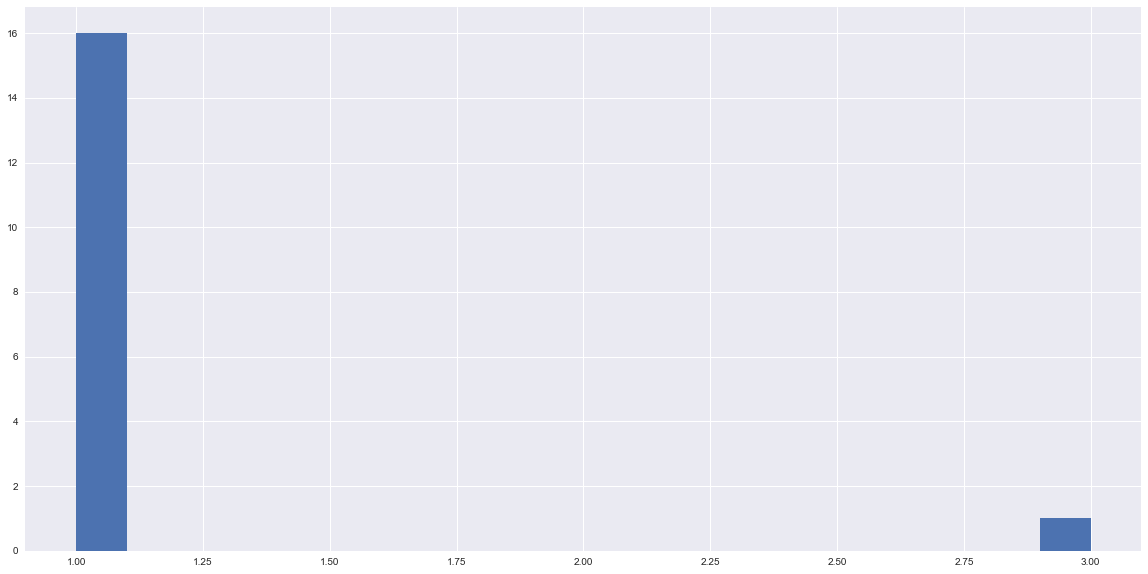

In [190]:
volume_per_user["Session Count"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

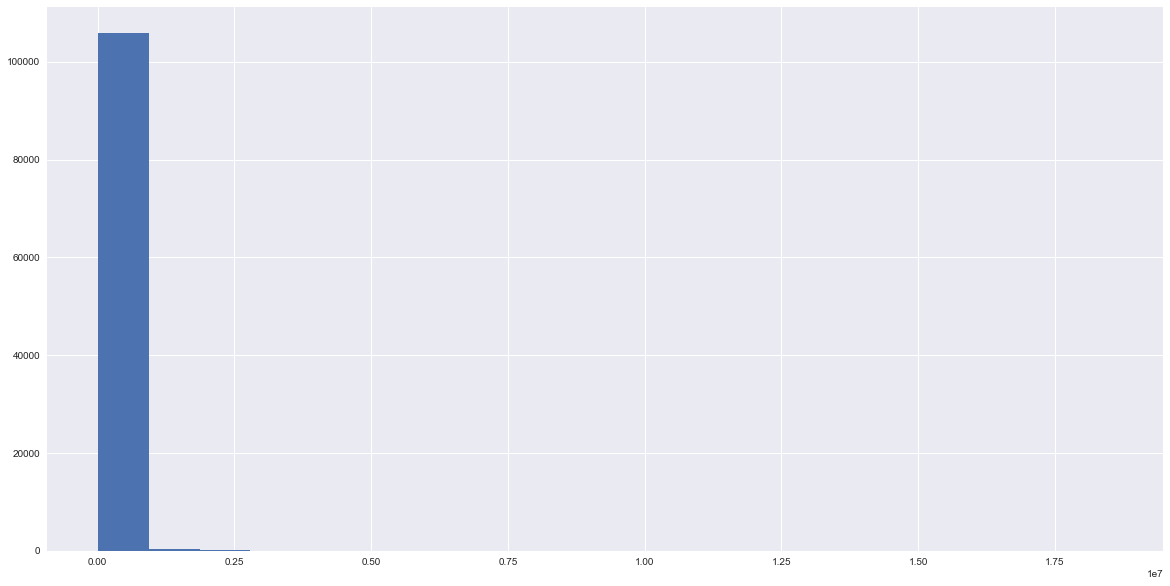

In [173]:
volume_per_user["Dur. (s)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

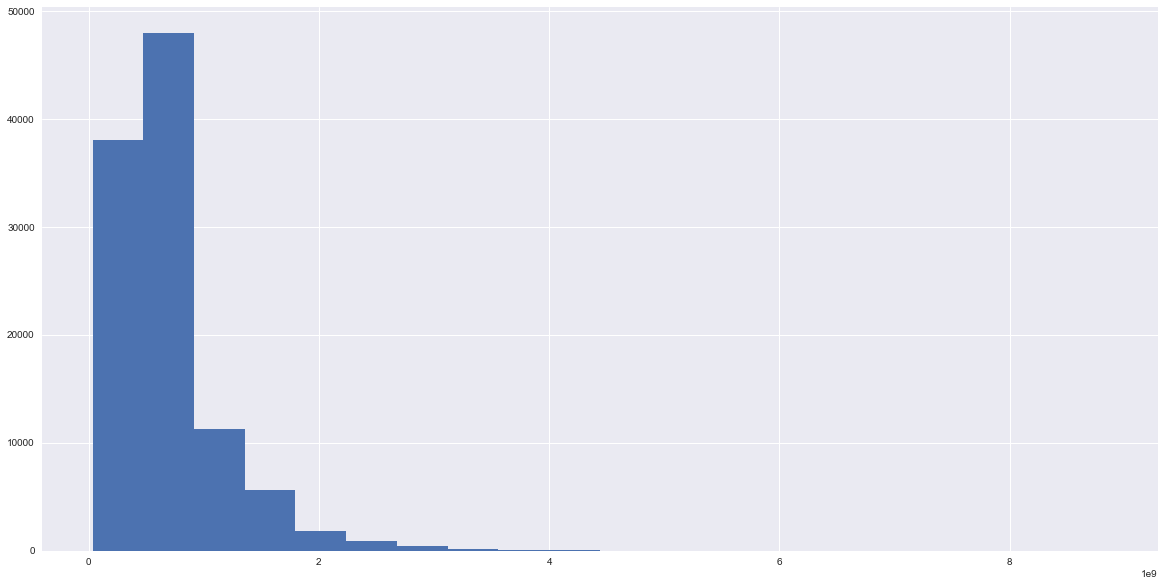

In [ ]:
volume_per_user["Total Data Transferred"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

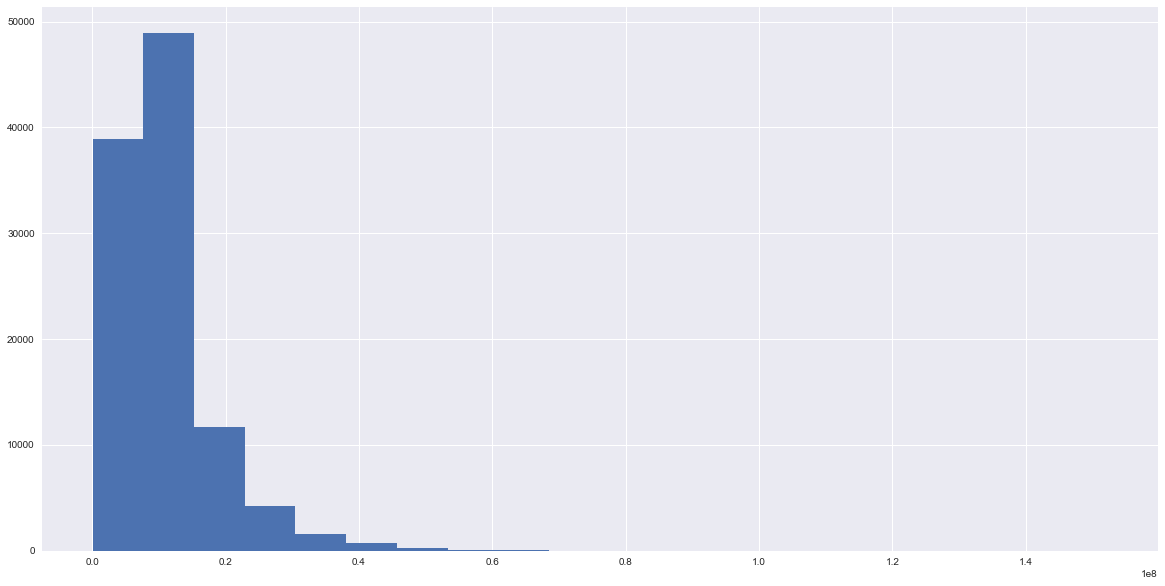

In [ ]:
volume_per_user["Google Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

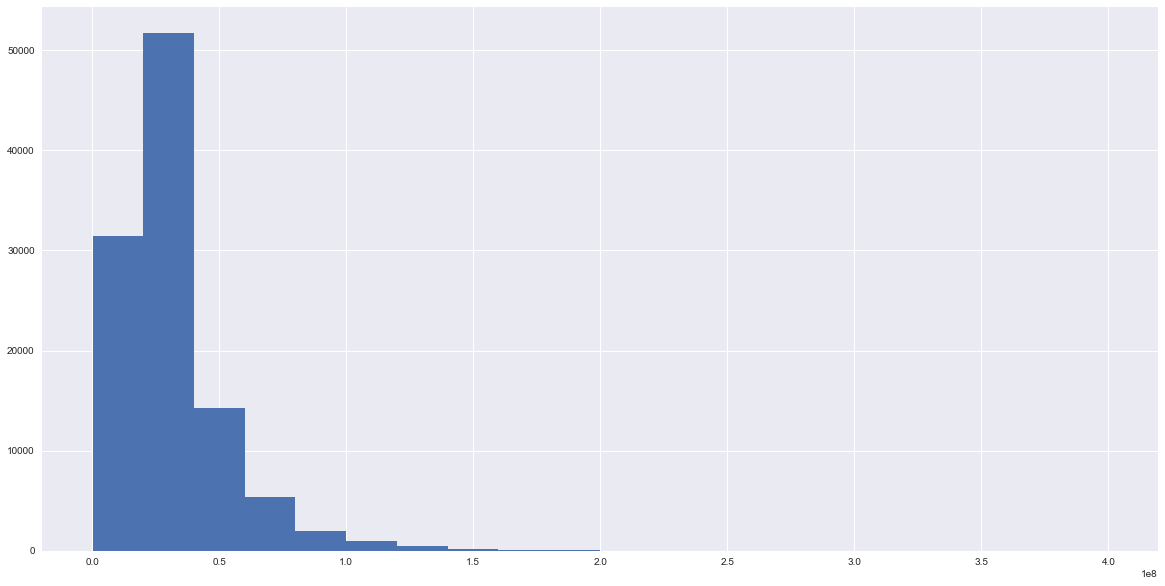

In [ ]:
volume_per_user["Netflix Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

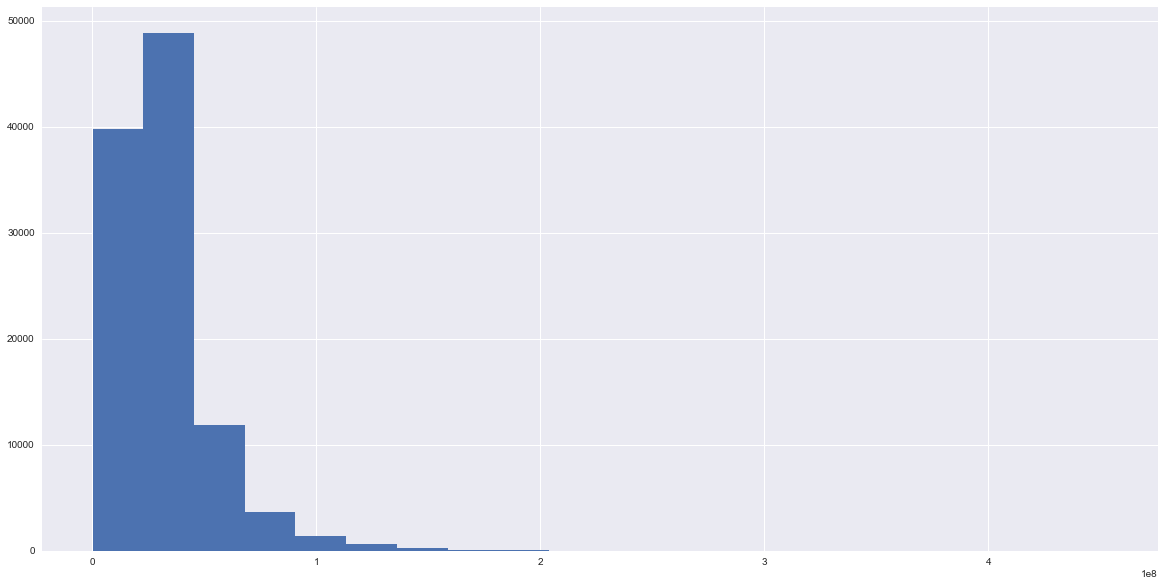

In [ ]:
volume_per_user["Youtube Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

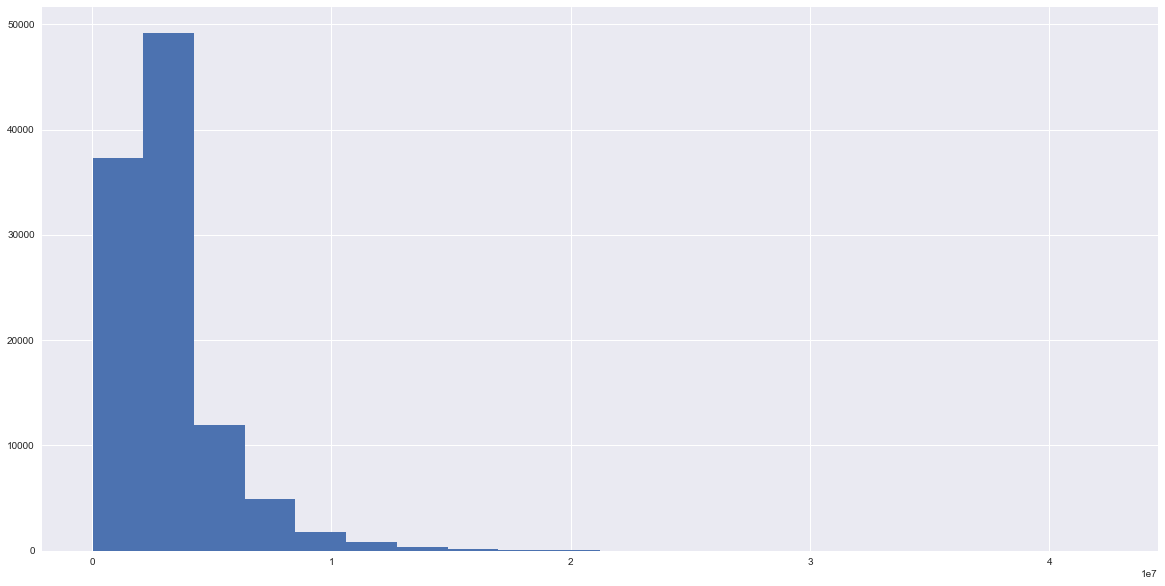

In [ ]:
volume_per_user["Email Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

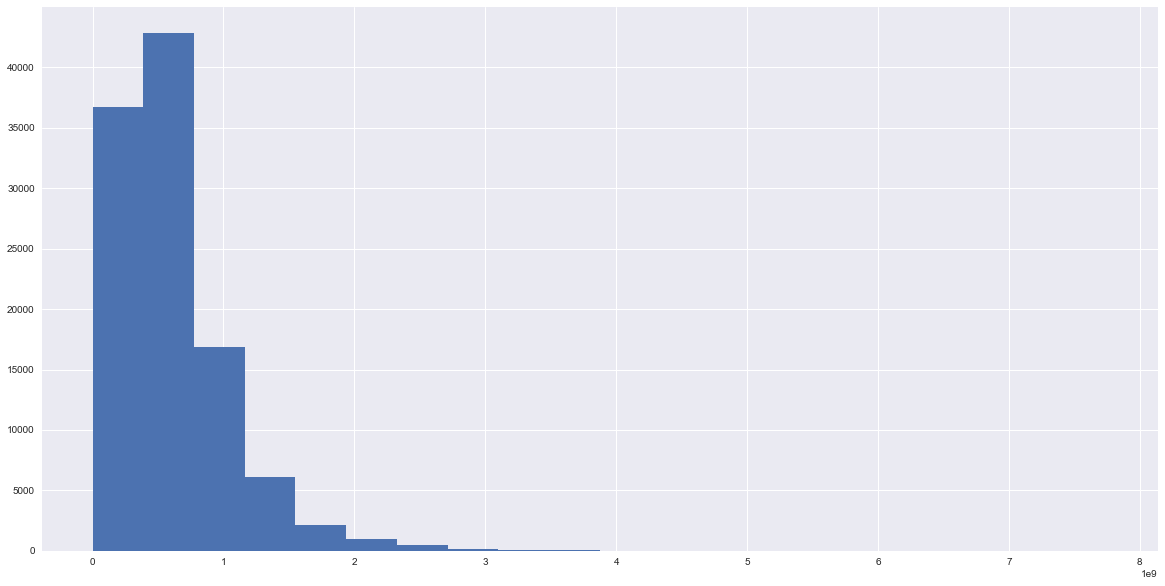

In [ ]:
volume_per_user["Gaming Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

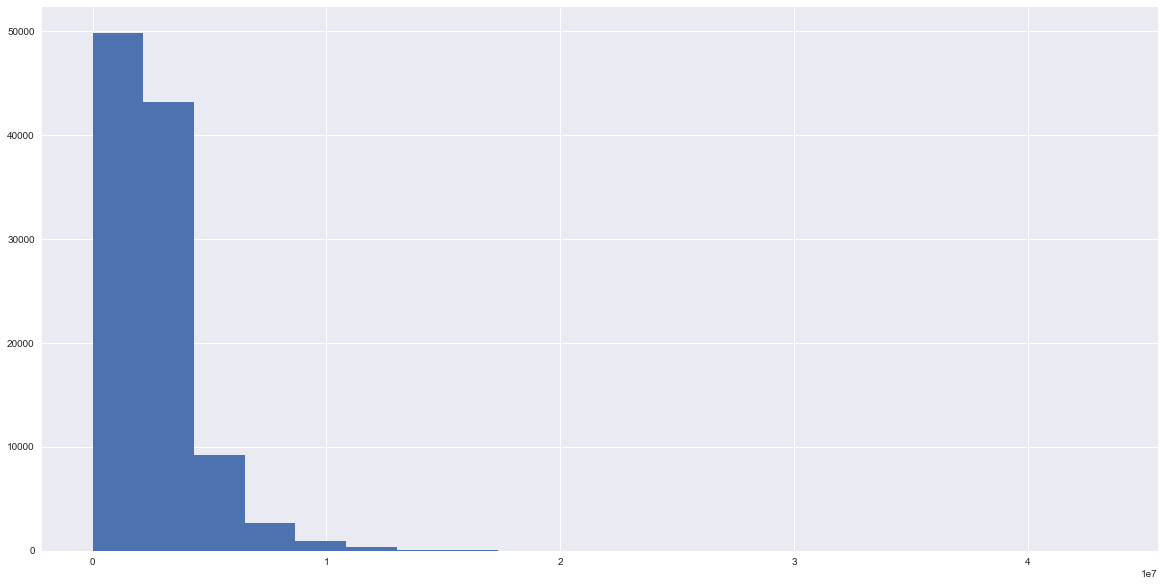

In [ ]:
volume_per_user["Social Media Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

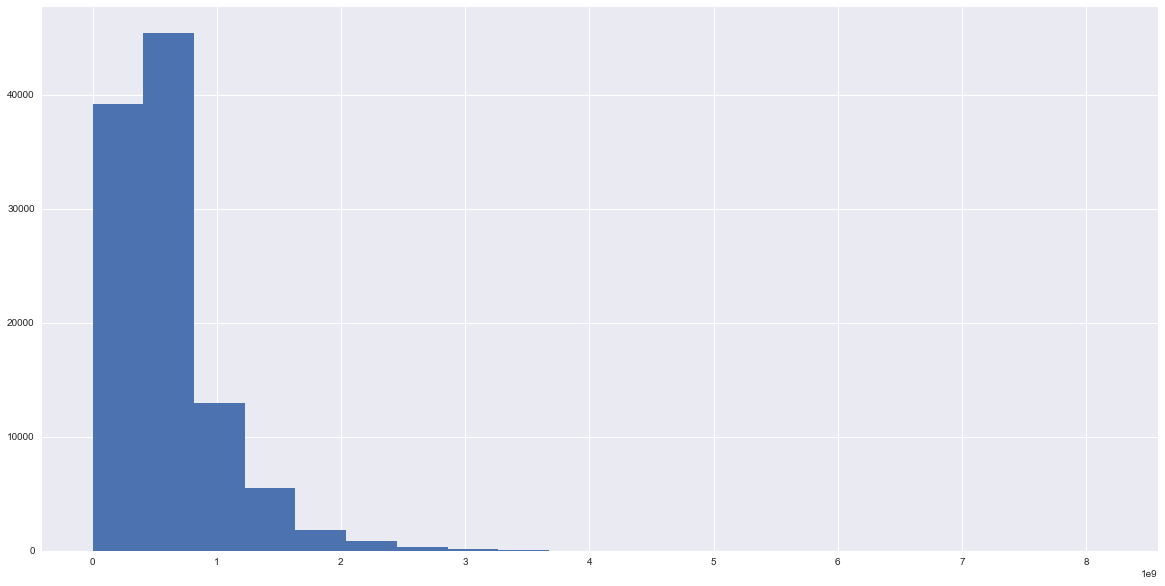

In [ ]:
volume_per_user["Other Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

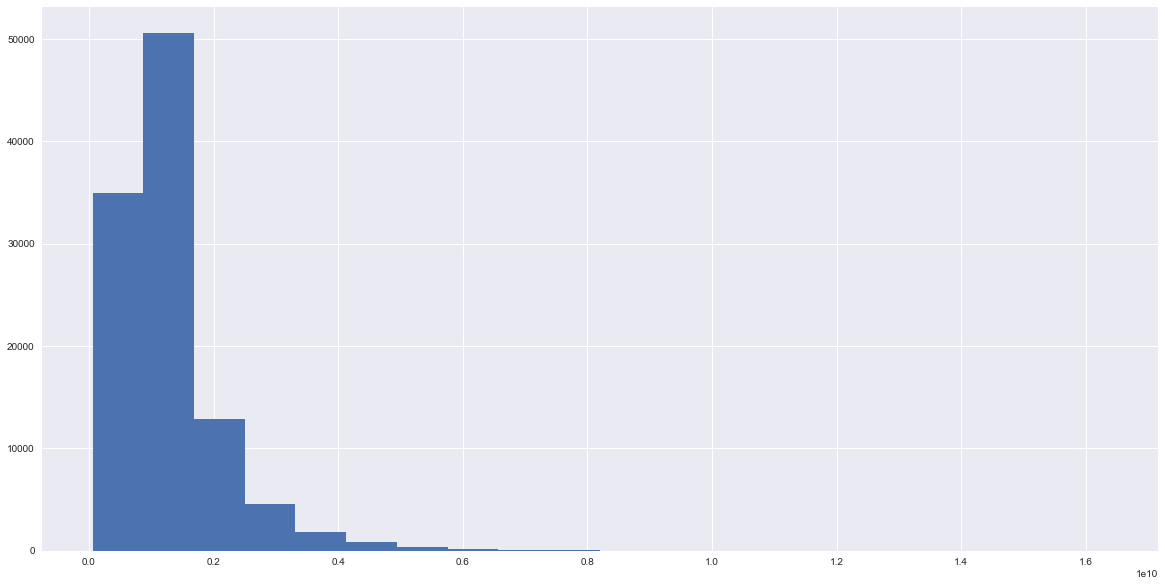

In [ ]:
volume_per_user["Total Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

array([[<AxesSubplot:title={'center':'Session Count'}>,
        <AxesSubplot:title={'center':'Dur. (s)'}>,
        <AxesSubplot:title={'center':'Total Data Transferred'}>],
       [<AxesSubplot:title={'center':'Google Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Netflix Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Youtube Volume (Bytes)'}>],
       [<AxesSubplot:title={'center':'Gaming Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Email Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Social Media Volume (Bytes)'}>],
       [<AxesSubplot:title={'center':'Other Volume (Bytes)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

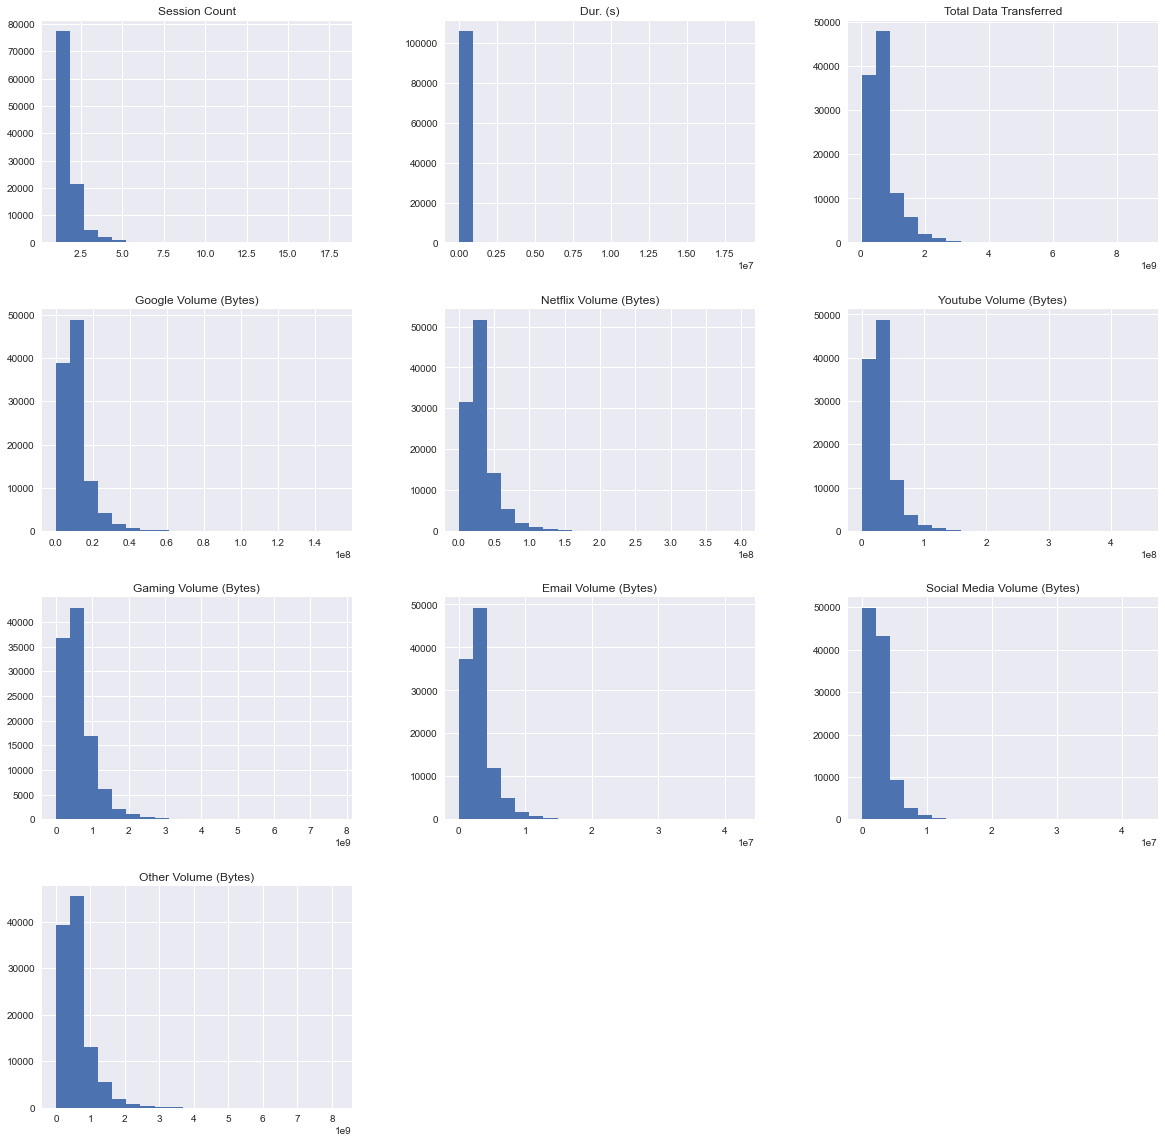

In [174]:
volume_per_user.hist(bins=20, figsize=(20, 20))

<AxesSubplot:>

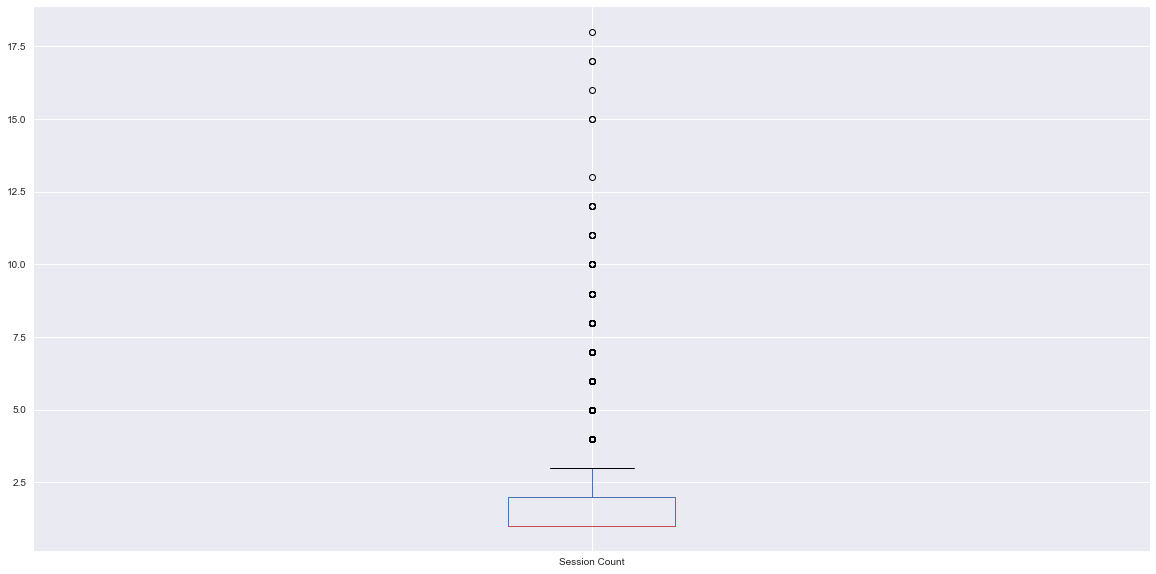

In [75]:
volume_per_user.boxplot(column=["Session Count"], figsize=(20, 10))

### Bivariate analysis
---

In [76]:
volume_per_user.corr()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
Session Count,1.00,0.64,0.81,0.84,0.86,0.86,0.77,0.82,0.77,0.77
Dur. (s),0.64,1.00,0.52,0.53,0.54,0.55,0.49,0.53,0.49,0.49
Total Data Transferred,0.81,0.52,1.00,0.68,0.71,0.71,1.00,0.66,0.62,0.62
Google Volume (Bytes),0.84,0.53,0.68,1.00,0.72,0.72,0.64,0.69,0.64,0.64
Netflix Volume (Bytes),0.86,0.54,0.71,0.72,1.00,0.74,0.66,0.71,0.66,0.66
Youtube Volume (Bytes),0.86,0.55,0.71,0.72,0.74,1.00,0.66,0.71,0.66,0.66
Gaming Volume (Bytes),0.77,0.49,1.00,0.64,0.66,0.66,1.00,0.63,0.59,0.59
Email Volume (Bytes),0.82,0.53,0.66,0.69,0.71,0.71,0.63,1.00,0.63,0.63
Social Media Volume (Bytes),0.77,0.49,0.62,0.64,0.66,0.66,0.59,0.63,1.00,0.59
Other Volume (Bytes),0.77,0.49,0.62,0.64,0.66,0.66,0.59,0.63,0.59,1.00


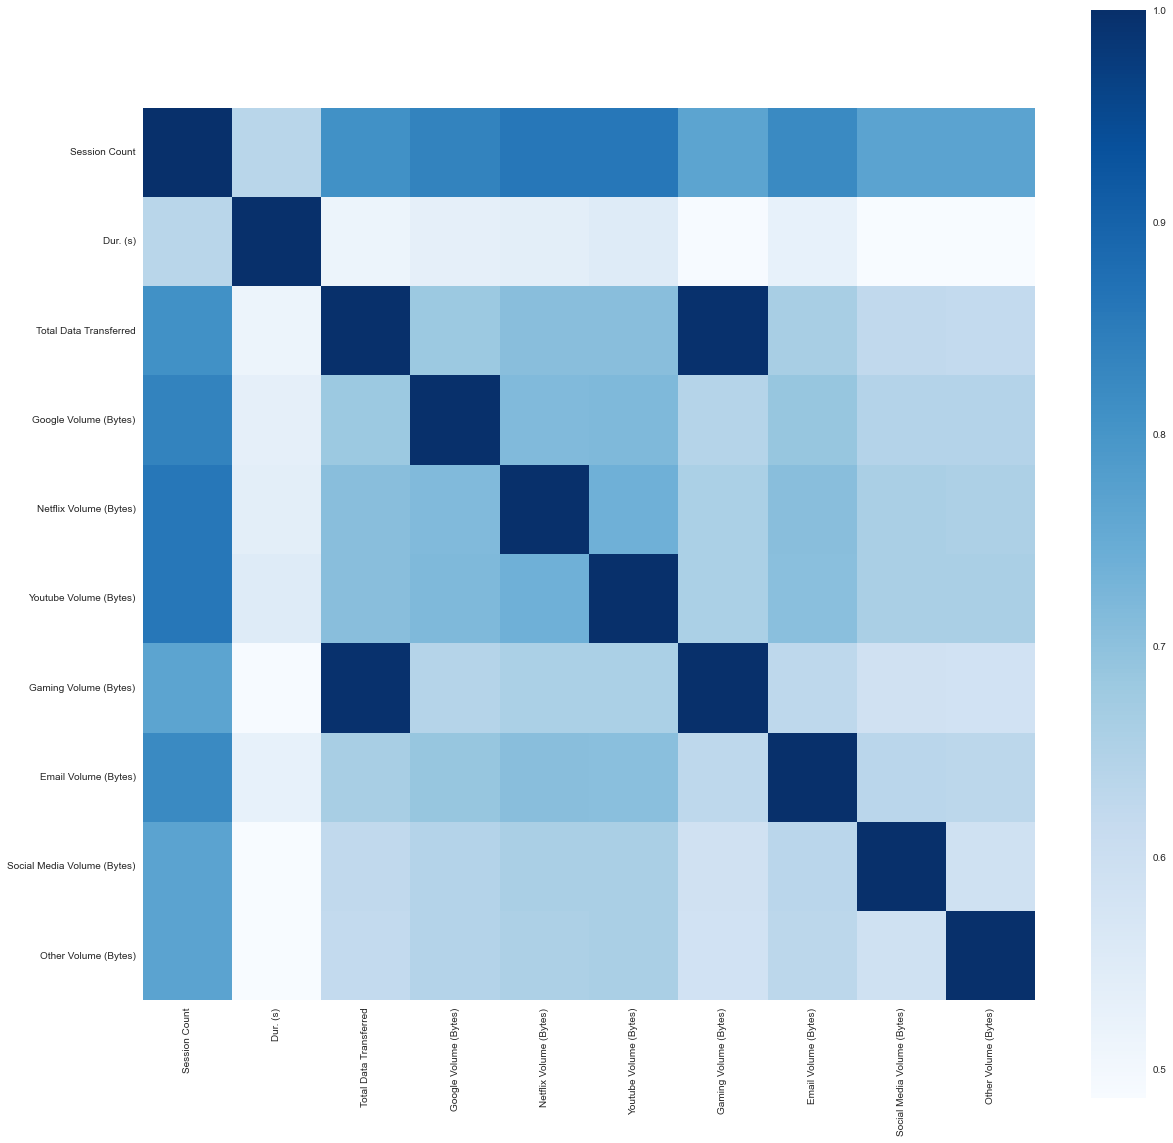

In [77]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(volume_per_user.corr(), cmap="Blues", square=True)

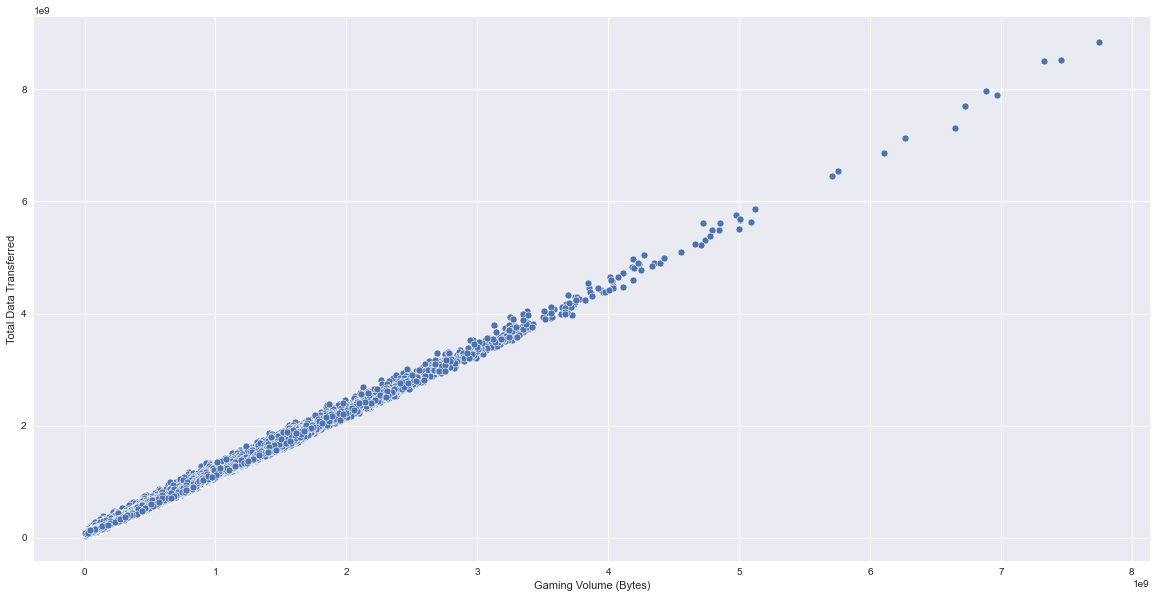

In [79]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.scatterplot(x= volume_per_user["Gaming Volume (Bytes)"], y= volume_per_user["Total Data Transferred"])

In [80]:
bivariate = volume_per_user.drop(columns=["MSISDN/Number", "Session Count", "Dur. (s)"])

In [81]:
bivariate.head()

,Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,878690574.00,4389005.00,27180981.00,21624548.00,812458661.00,1331362.00,2232135.00,386570872.00
1,156859643.00,5334863.00,11221763.00,12432223.00,119750078.00,3307781.00,2660565.00,281710071.00
2,595966483.00,3443126.00,19353900.00,21333570.00,538827713.00,3205380.00,3195623.00,501693672.00
3,422320698.00,9678493.00,1942092.00,6977321.00,391126127.00,2284670.00,280294.00,35279702.00
4,1457410944.00,18499616.00,49201724.00,41533002.00,1314797820.00,3305469.00,2912542.00,804804484.00


<AxesSubplot:xlabel='Netflix Volume (Bytes)', ylabel='Total Data Transferred'>

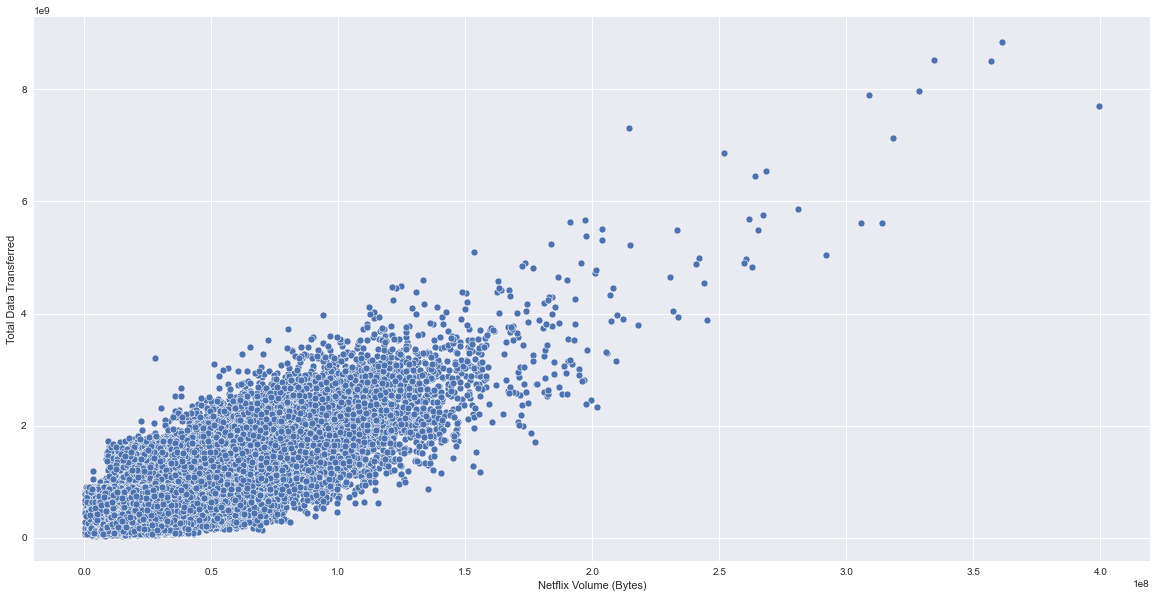

In [82]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.scatterplot(x=bivariate["Netflix Volume (Bytes)"], y=bivariate["Total Data Transferred"], ax=ax)

### Decile Rank
---

In [192]:
volume_per_user["Decile Rank"] = pd.qcut(volume_per_user["Dur. (s)"], 10, labels=False)
volume_per_user.head()

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Decile Rank
0,33603291937,1,850766,848798988,13395961,22810379,26178247,769947925,3424203,1715492,45876928,3
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130,9
2,33664473872,1,889834,568809782,8822396,20124838,19623308,505668618,2348652,839351,538369717,3
3,33664962239,1,1823652,345629377,2905912,17855187,18355943,292426453,3701304,1570185,180558843,9
4,33665368271,1,1035261,118487293,4906872,31212766,9120760,58881157,2090979,1624991,814303325,5


In [196]:
# top 5 decile ranks
volume_per_user.nsmallest(columns=["Decile Rank"], n=5)

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Decile Rank
8,33669013307,1,767722,199593503,3793544,19965376,36068912,124373236,1055306,1252821,371687999,0
11,33698759051,1,778387,410517220,6134557,30899577,21482026,330372600,3295932,3345436,56842974,0
7,33668779552,1,780991,287850908,4850460,19664286,24448878,224103562,2953097,2330089,314117834,1
14,33753758738,1,780471,101047021,6491896,5557753,26558004,42366688,2653810,2066962,152500509,1
5,33665646348,1,848637,651527183,6532777,26779600,21981135,574923841,3780918,2697600,110548061,2


In [201]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 0]["Total Data Transferred"].sum()

610110723

In [202]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 1]["Total Data Transferred"].sum()

388897929

In [203]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 2]["Total Data Transferred"].sum()

651527183

In [204]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 3]["Total Data Transferred"].sum()

1417608770

In [205]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 4]["Total Data Transferred"].sum()

1738138766

### PCA Analysis
---

In [207]:
from sklearn.decomposition import PCA

In [208]:
pca = PCA(n_components=2)

In [212]:
principal_components = pca.fit_transform(volume_per_user)

In [213]:
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

In [214]:
principal_df.head()

,principal component 1,principal component 2
0,328771813.70,-355271462.03
1,1626075947.44,-63963639.51
2,-45007348.98,148425229.13
3,-362200847.04,-201627449.95
4,-671975223.92,438765269.36
